<a href="https://colab.research.google.com/github/veshitala/darkflow/blob/master/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! git clone https://github.com/veshitala/darkflow.git

Cloning into 'darkflow'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 2788 (delta 22), reused 0 (delta 0), pack-reused 2746
Receiving objects: 100% (2788/2788), 34.69 MiB | 40.18 MiB/s, done.
Resolving deltas: 100% (1798/1798), done.


In [0]:
ls

darkflow/  sample_data/


In [0]:
cd ./darkflow/

/content/darkflow


In [0]:
! python3 setup.py build_ext --inplace


Compiling darkflow/cython_utils/nms.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo2_findboxes.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo_findboxes.pyx because it changed.
[1/3] Cythonizing darkflow/cython_utils/cy_yolo2_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo2_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/3] Cythonizing darkflow/cython_utils/cy_yolo_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[3/3] Cythonizing darkflow/cython_utils/nms.pyx
/usr/

In [0]:
! pip install -e .


Obtaining file:///content/darkflow
  Running setup.py develop for darkflow


In [0]:
! pip install .


Processing /content/darkflow
  Stored in directory: /tmp/pip-ephem-wheel-cache-xsxhzx4t/wheels/2f/3a/c5/e84e79d73d5a73aa1b5129a66a40947d9d77a32ebed501e431
Successfully built darkflow
  Found existing installation: darkflow 1.0.0
    Can't uninstall 'darkflow'. No files were found to uninstall.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from darkflow.net.build import TFNet
import cv2


In [0]:
## Start by connecting gdrive into the google colab
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
ls

build/  darkflow/           flow*       preview.png  setup.py
cfg/    darkflow.egg-info/  labels.txt  README.md    test/
ckpt/   demo.gif            LICENSE     sample_img/


In [0]:
options = {"model": "./cfg/yolov2-voc-1c.cfg", 
           "load": "/content/gdrive/My Drive/YOLO/yolov2-voc.weights",
           "batch": 4,
           "epoch": 100,
           "gpu": 1.0,
           "train": True,
           "annotation": "/content/gdrive/My Drive/YOLO/yolo_dataset/annotations/",
           "dataset": "/content/gdrive/My Drive/YOLO/yolo_dataset/images/"}

In [0]:
tfnet = TFNet(options)


Parsing ./cfg/yolov2-voc.cfg
Parsing ./cfg/yolov2-voc-1c.cfg
Loading /content/gdrive/My Drive/YOLO/yolov2-voc.weights ...
Successfully identified 202704264 bytes
Finished in 0.6078505516052246s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!

In [0]:
tfnet.train()




./cfg/yolov2-voc-1c.cfg parsing /content/gdrive/My Drive/YOLO/yolo_dataset/annotations/
Parsing for ['monkey'] 
[====================>]100%  monkey.286.xml
Statistics:
monkey: 485
Dataset size: 287
Dataset of 287 instance(s)
Training statistics: 
	Learning rate : 1e-05
	Batch size    : 4
	Epoch number  : 100
	Backup every  : 2000
step 1 - loss 103.22227478027344 - moving ave loss 103.22227478027344
step 2 - loss 101.75859069824219 - moving ave loss 103.0759063720703
step 3 - loss 100.59942626953125 - moving ave loss 102.82825836181641
step 4 - loss 99.34361267089844 - moving ave loss 102.4797937927246
step 5 - loss 99.3489990234375 - moving ave loss 102.1667143157959
step 6 - loss 97.3719482421875 - moving ave loss 101.68723770843506
step 7 - loss 96.78421783447266 - moving ave loss 101.19693572103883
step 8 - loss 96.49871826171875 - moving ave loss 100.72711397510682
step 9 - loss 96.82070922851562 - moving ave loss 100.33647350044771
step 10 - loss 95.90927124023438 - moving ave lo

In [0]:
tfnet.savepb()

In [0]:

options = {"model": "cfg/yolov2-voc-1c.cfg",
           "load": 5500,
           "gpu": 1.0,
          "threshold":0.01}
  


"""options = {"model": "cfg/yolov2-voc-1c.cfg",
           "load": 5500,
           "gpu": 1.0,
          "threshold":0.01,
          "pbLoad":"/contrnt/gdrive/My Drive/" ,
          "metaLoad":"/content/gdrive/My Drive/"}"""



In [0]:
tfnet2 = TFNet(options)


Parsing cfg/yolov2-voc-1c.cfg
Loading None ...
Finished in 0.00014495849609375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 52,

In [0]:

tfnet2.load_from_ckpt()

Loading from ./ckpt/yolov2-voc-1c-5500
INFO:tensorflow:Restoring parameters from ./ckpt/yolov2-voc-1c-5500


In [0]:
import pprint as pp

original_img = cv2.imread("/content/gdrive/My Drive/test_image3.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(original_img)
print(results)


[{'label': 'monkey', 'confidence': 0.042129762, 'topleft': {'x': 75, 'y': 88}, 'bottomright': {'x': 236, 'y': 339}}]


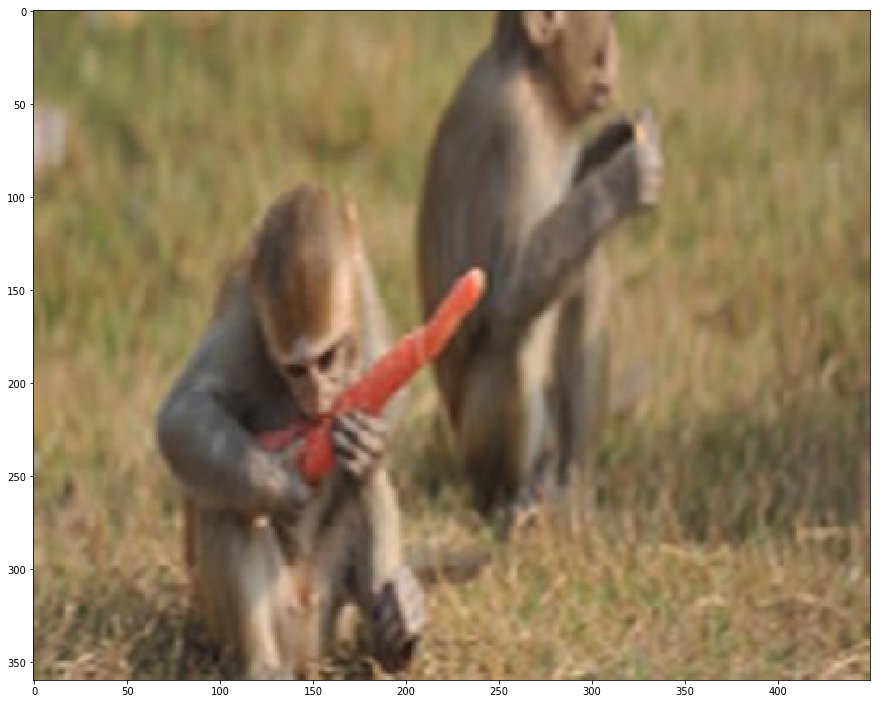

In [0]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)

In [0]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.03:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

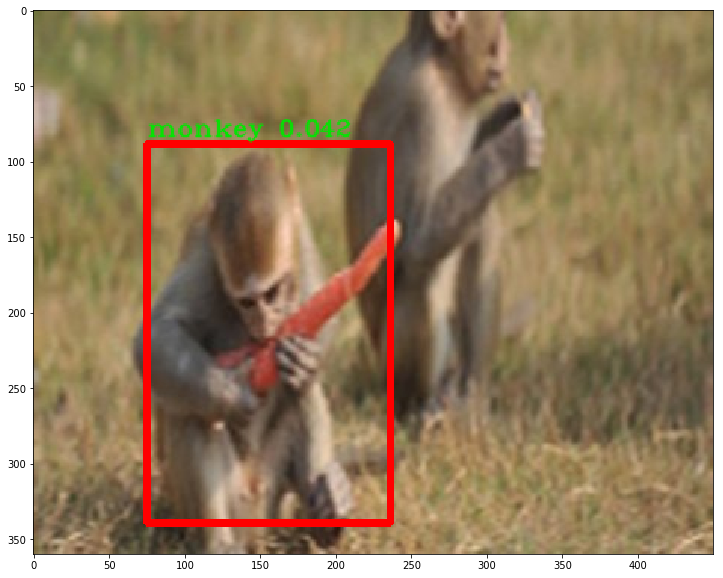

In [0]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))

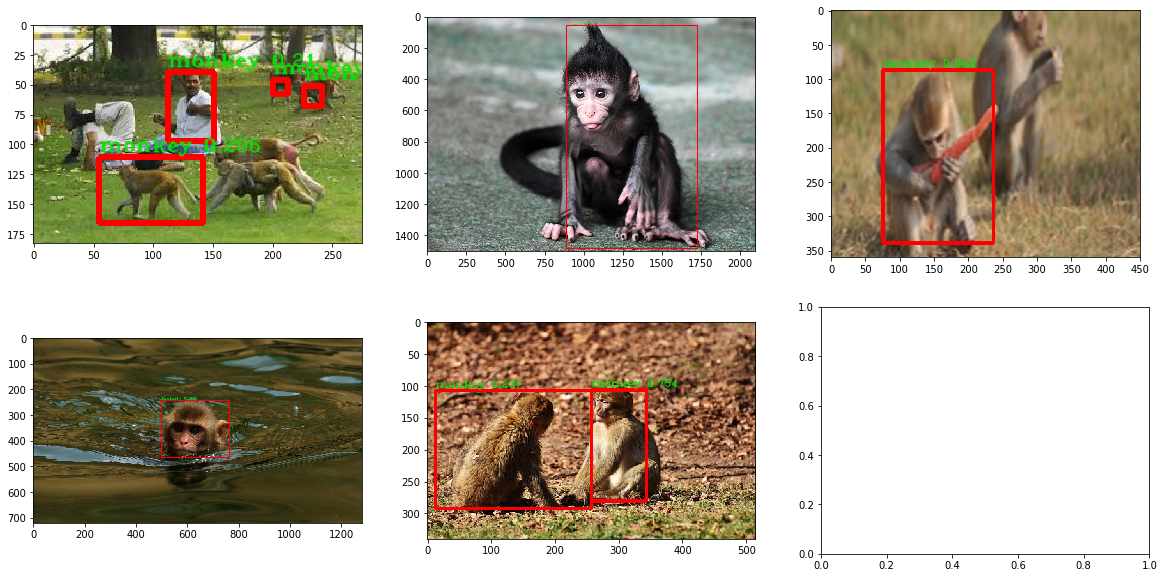

In [0]:
from math import ceil

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

for i in range(5):
    original_img = cv2.imread("/content/gdrive/My Drive/test_image" + str(i+1) + ".jpg")
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    results = tfnet2.return_predict(original_img)
    
    ax[ceil(i/3)-1, i%3].imshow(boxing(original_img, results))


options = {"model": "cfg/tiny-yolo-1c.cfg",
           "load": -1,
           "gpu": 1.0,
          "threshold": 0.5}
          
          **Working**

options = {"model": "./cfg/yolov2-tiny-1c.cfg", 
           "load": "/content/gdrive/My Drive/YOLO/yolov2-tiny.weights",
           "batch": 64,
           "epoch": 100,
           "gpu": 1.0,
           "train": True,
           "annotation": "/content/gdrive/My Drive/YOLO/annotations/",
           "dataset": "/content/gdrive/My Drive/YOLO/images/"}
           
           **working**

options = {"model": "./cfg/yolov2-voc-1c.cfg", 
           "load": "/content/gdrive/My Drive/YOLO/yolov2-voc.weights",
           "batch": 8,
           "epoch": 100,
           "gpu": 1.0,
           "train": True,
           "annotation": "/content/gdrive/My Drive/YOLO/annotations/",
           "dataset": "/content/gdrive/My Drive/YOLO/images/"}
           
# working

In [0]:
#Inference on video

cap = cv2.VideoCapture('/content/gdrive/My Drive/monkey.webm')
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 

fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('/content/gdrive/My Drive/output2.mp4',fourcc, 20.0, (int(width), int(height)))

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if ret == True:
        frame = np.asarray(frame)      
        results = tfnet2.return_predict(frame)
        
        new_frame = boxing(frame, results)

        # Display the resulting frame
        out.write(new_frame)
        #cv2.imshow('frame', new_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
# When everything done, release the capture
cap.release()
out.release()
cv2.destroyAllWindows()    

In [0]:
!pip install tensorwatch


     |████████████████████████████████| 163kB 3.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/16/d7/11/b0d26a125f5d7b2034051bfc8ed4fd5c5d7cbe73c23baedde6
Successfully built tensorwatch


In [0]:
import tensorwatch as tw
import time

# streams will be stored in test.log file
w = tw.Watcher(filename='test.log')

# create a stream for logging
s = w.create_stream(name='metric1')

# generate Jupyter Notebook to view real-time streams
w.make_notebook()

for i in range(1000):
    # write x,y pair we want to log
    s.write((i, i*i)) 

    time.sleep(1)